# Reto 03
**_Dr. Antonio Arista Jalife_**

Esta es la solución al reto 03, y si no lo has resuelto, te invito a intentar con el otro cuaderno! No te rindas!

Para comenzar con la solución, añadiremos las librerías que necesitamos. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import confusion_matrix

Hacemos 1000 blobs aleatorios, con 10 características cada uno, pero solo 2 clases (o centers). Una vez generados, vamos a separarlos en entrenamiento y pruebas. 60% entrenamiento, 40% pruebas.

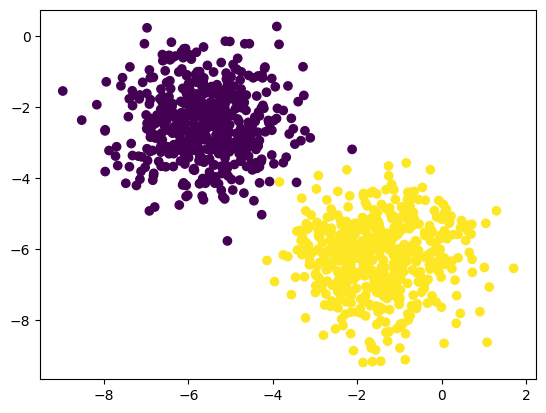

In [2]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(x, y, test_size =0.40)

Vamos a generar un bosque de 800 árboles de decisión, y los vamos a entrenar con los datos de entrenamiento. Una vez entrenado el bosque, haremos que trate de predecir los datos con las entradas de prueba (x_pruebas)

In [3]:
bosque = forest(n_estimators = 800)
bosque.fit(x_entrenamiento, y_entrenamiento)
y_predichos = bosque.predict(x_pruebas)

Utilizando lo aprendido de la sesión 2, vamos a generar una matriz de confusión, y vamos a buscar los TP, TN, FP, y FN

In [4]:
resultado = confusion_matrix(y_pruebas, y_predichos)
print(resultado)

[[197   0]
 [  0 203]]


In [5]:
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

True positives: 203
True negatives: 197
False positives: 0
False negative: 0


Y recordando la sesión 02, vamos a calcular la accuracy, sensibilidad y especificidad.

In [6]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%
